## **OOP: EXAMPLE 3**

1. Extract **Classes** from **Example 1** (Define a method to calculate different mathematical operations), save it in a file, load it and finally use it.

In [ ]:
%load_ext autoreload
%autoreload 2
# load my own functions
from utils.Calc import *

In [ ]:
## Execution
a= 2
b= 2
x = Calc(a,b)
x.add()

*************************************

2. Extract **Classes** from **Example 2** (Build a simple linear regression estimator class following the OOP paradigm), save it in a file, load it and finally use it.

### **First Alternative**

In [3]:
%load_ext autoreload
%autoreload 2
# load my own functions
from utils.MyLinearRegression import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
mlr = MyLinearRegression()

In [5]:
X = 10*np.random.random(size=(20,2))
y = 3.5*X.T[0]-1.2*X.T[1]+2*np.random.randn(20)

In [6]:
mlr.fit(X,y)

In [7]:
print("We have fitted the data.")
print("Regression coefficients:", mlr.coef_)
print("The intercept term is given by: ", mlr.intercept_)

We have fitted the data.
Regression coefficients: [ 3.37115721 -1.60532595]
The intercept term is given by:  3.697947119815389


### **Second Alternative**

Using the file MyLinearRegressionClass.py in this same folder.

In [8]:
from MyLinearRegressionClass import MyLinearRegression as mlr
import numpy as np
import matplotlib.pyplot as plt

In [9]:
num_samples=40
num_dim = 5
X = 10*np.random.random(size=(num_samples,num_dim))
coeff = np.array([2,-3.5,1.2,4.1,-2.5])
y = np.dot(coeff,X.T)+10*np.random.randn(num_samples)

In [10]:
model = mlr()

In [11]:
model.ingest_data(X,y)

In [12]:
model.features_[:10]

array([[1.39591642, 7.59887586, 1.78546914, 9.57678168, 9.1953306 ],
       [1.57680939, 4.13917563, 5.8726799 , 7.13671772, 6.84532114],
       [9.41705519, 5.23388387, 2.23676927, 4.71070695, 9.97676459],
       [2.05697268, 3.31282871, 3.22604858, 2.58933739, 0.34748237],
       [0.97720191, 9.79307058, 4.60702691, 7.53782615, 0.42661291],
       [7.68931088, 2.79777769, 2.97266805, 4.28593191, 9.22796539],
       [6.74128964, 6.34158697, 1.0626455 , 5.73072137, 8.68807961],
       [2.35023421, 8.46234371, 1.79949665, 9.54244443, 3.04944533],
       [3.69345857, 7.91587391, 8.79013527, 3.24027919, 9.98024295],
       [5.90025739, 4.1222596 , 0.07973732, 4.98656122, 8.66580099]])

#### **Fit the model with fit**

In [13]:
model.fit()

## **Degrees of freedom**

Atributes associated with the dataset -degrees of freedom. They will be computed when we try to fit a dataset.

* dft_:degrees of freedom of the estimate of the population variance of the dependent variable
* dfe_:degrees of freedom of the estimate of the underlying population error variance

In [14]:
model.dfe_

34

In [15]:
model.dft_

39

## **Metrics class**

We have a separated class for Metrics, this class inheritage values from the MyLinearRegressionClass. Note that the class Metrics has not __init__ method because we will never instanciate and object using this class. Rather, we will sort of absorb this class into MyLinearRegression class.

In [16]:
# print parameters
print ("R-squared: ",model.r_squared())
print ("Adjusted R-squared: ",model.adj_r_squared())
print("MSE: ",model.mse())

R-squared:  0.6323387098757232
Adjusted R-squared:  0.5782708730927413
MSE:  135.19145201973436


In [17]:
print("P-values:",model.pvalues())
print("t-test values:",model.tvalues())
print("Standard errors:",model.std_err())

P-values: [6.37665642e-01 1.63900827e-04 3.23281951e-05 1.29117925e-01
 8.91430525e-07 8.98506159e-05]
t-test values: [-0.47522473  4.2358255  -4.78761489  1.5553717   5.98846222 -4.44156785]
Standard errors: [8.77270855 0.8172534  0.80157464 0.74558042 0.80373786 0.69635868]


## **Separated Visual diagnostics**

* Residuals vs. predicting variables plots
* Fitted vs. residuals plot
* Histogram of the normalized residuals
* Q-Q plots of the normalized residuals.

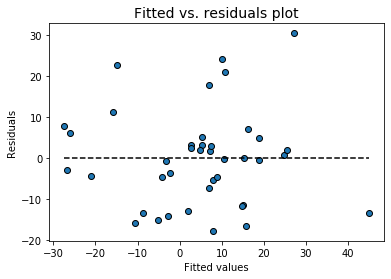

In [18]:
# Fitted vs. residuals plot (to check for linearity and homoscadasticity)
model.fitted_vs_residual()

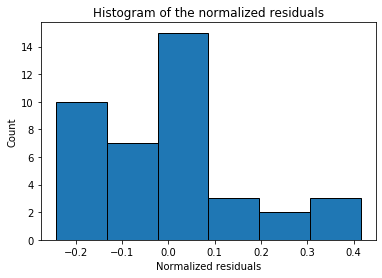

In [19]:
model.histogram_resid()

In [20]:
model.shapiro_test()

The residuals seem to have come from a Gaussian process


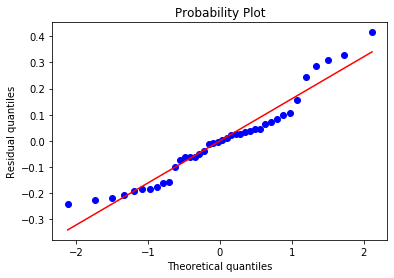

In [21]:
model.qqplot_resid()

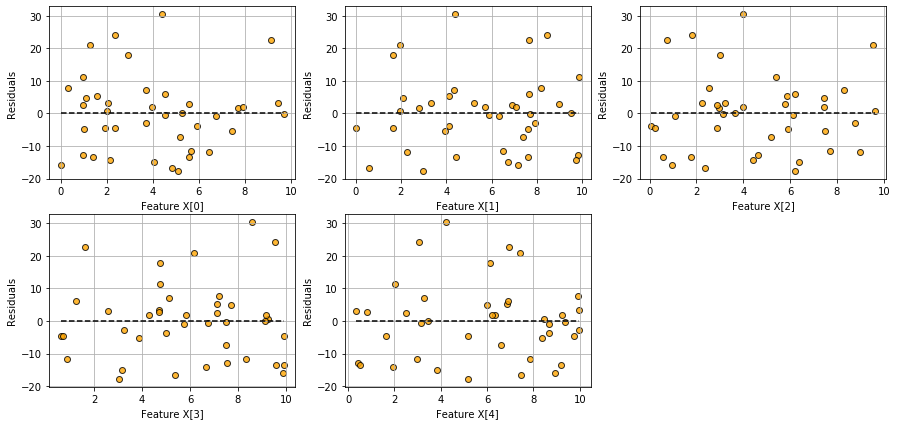

In [22]:
#Fitted values vs. feature variables
model.fitted_vs_features()

This may take a little time. Have patience...


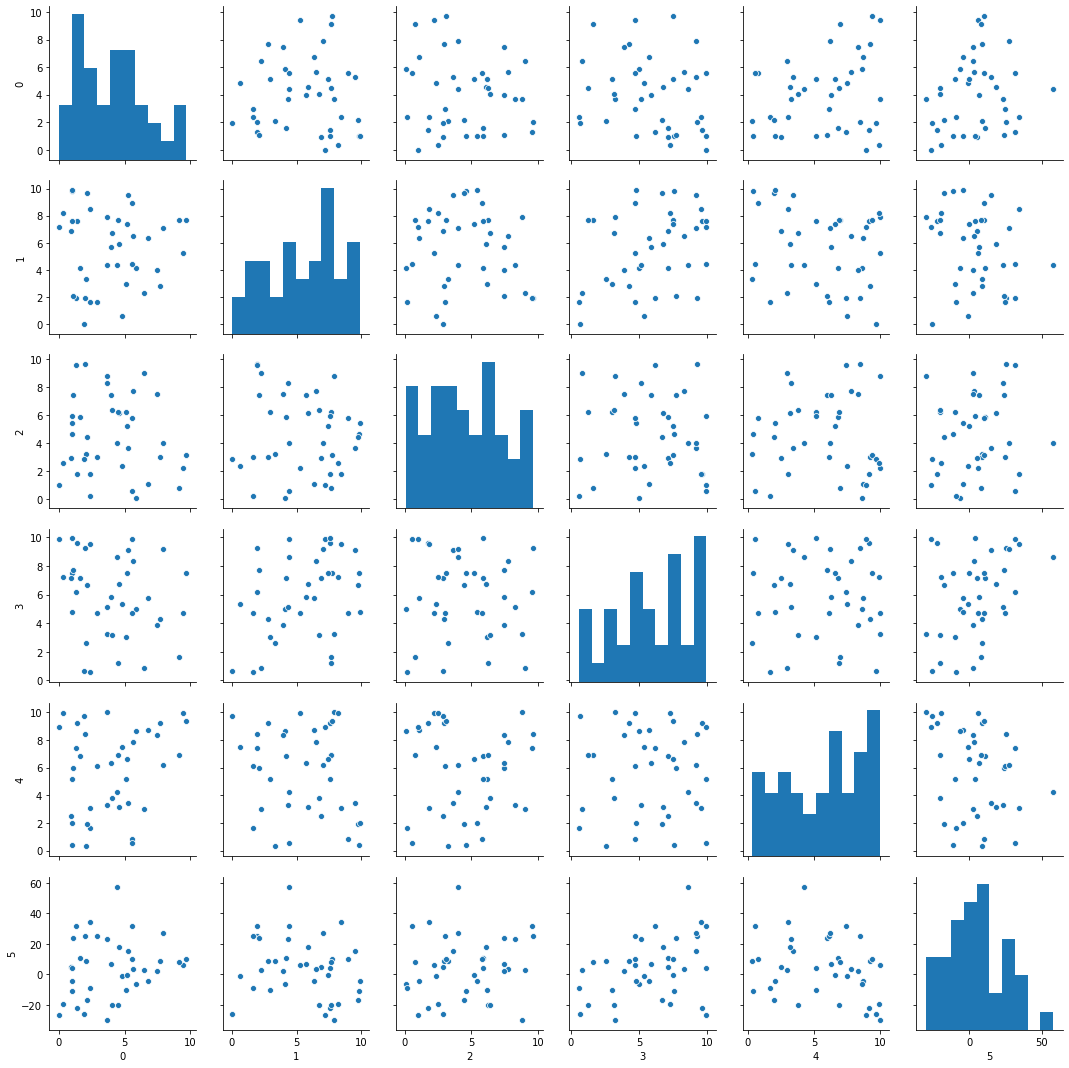

In [23]:
#Pairplot of the dataset
model.pairplot()

## **OUTLIER DETECTION**

Outliers can also be an issue impacting the model quality by having a disproportionate influence on the estimated model parameters. We can use a measure called **Cook's distance** to check for outliers. It essentially measures the effect of deleting a given observation. Points with a large Cook's distance need to be closely examined for being potential outliers.

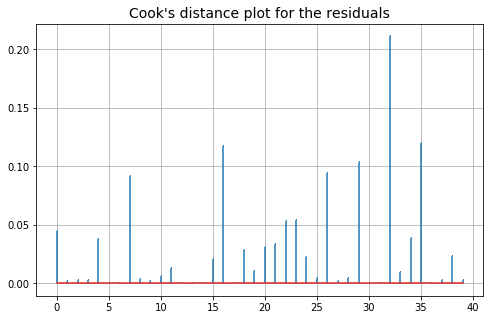

In [24]:
#Cook's distance plot
model.cook_distance()

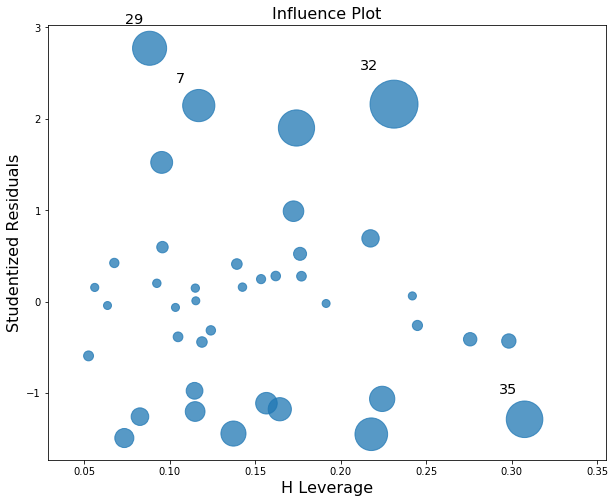

In [25]:
#Influence plot
model.influence_plot()

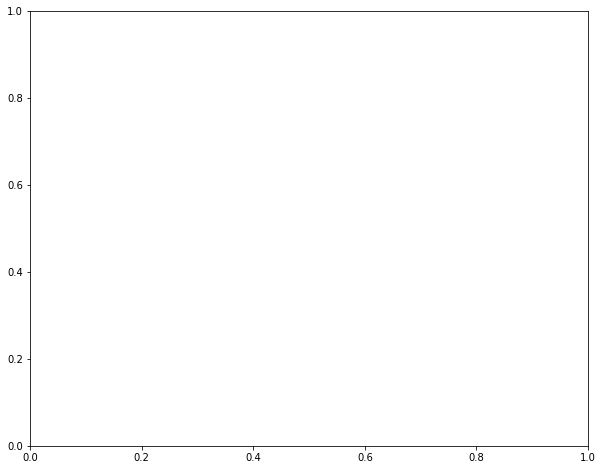

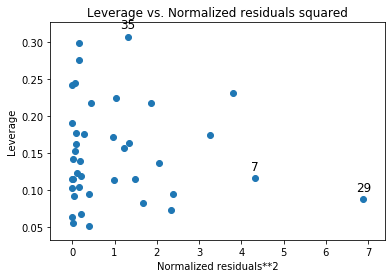

In [34]:
#leverage residual plots
model.leverage_resid_plot()

## **Multicollinearity check**

For multiple linear regression the assumption assumes minimal or no lineal dependence between predicting variables.
So, to check that we can compute the variance influence factors (VIF) for each predicting variable. it is the ratio of variance in a model with multiple terms, divide by the variance of a model with one term alone.

In [26]:
#Variance inflation factors
model.vif()

Variance inflation factor for feature 0: 3.29
Variance inflation factor for feature 1: 5.25
Variance inflation factor for feature 2: 2.91
Variance inflation factor for feature 3: 5.71
Variance inflation factor for feature 4: 4.33


## **All Visual diagnostics**

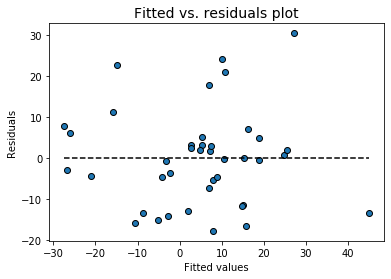

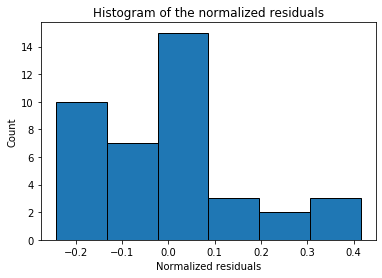

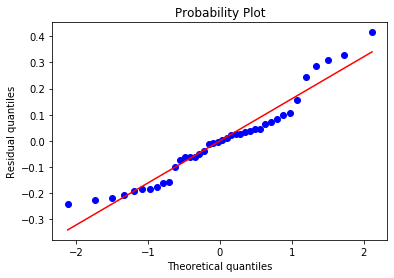


The residuals seem to have come from a Gaussian process


In [27]:
#Generate all diagnostics plots with run_diagnostics
model.run_diagnostics()

## **ALL OULIERS PLOTS**

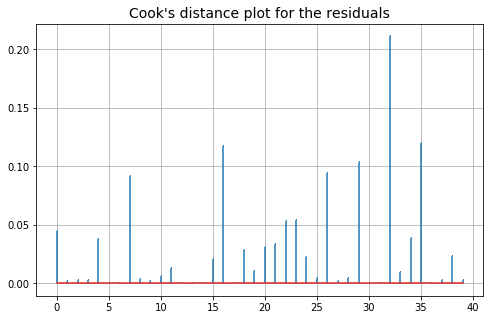

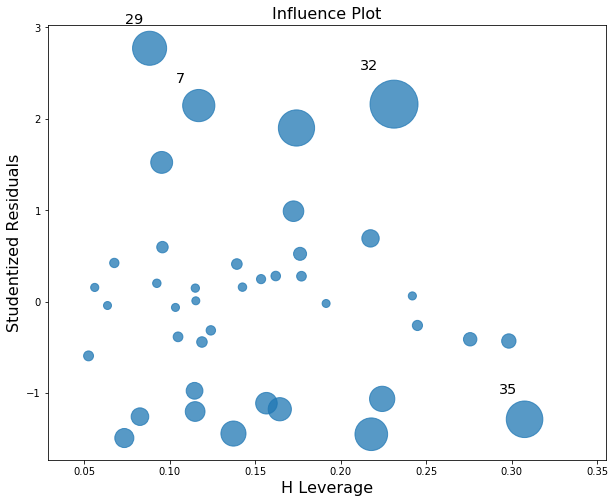

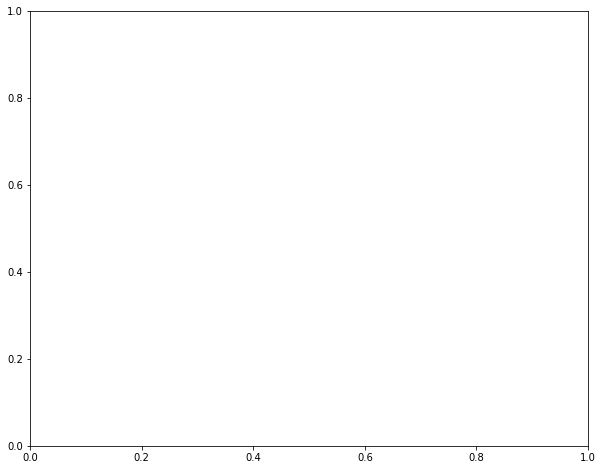

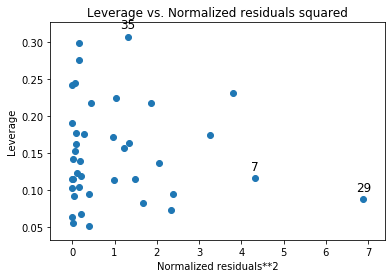

In [35]:
model.outlier_plots()

## **PREDICT**

In [28]:
#Predict with new samples
num_samples=20
num_dim =5
X_test = 10*np.random.random(size=(num_samples,num_dim))
model.predict(X_test)

array([  4.79393011,  49.78590596,  19.18159152,  41.86743232,
        25.59309576,  60.28338181,  18.81602925,   1.42937308,
         3.28753448,  41.36224714,  36.03639774,  -0.68240938,
       -16.53492031, -11.03130255,  32.04320736,  36.71756333,
         1.96623513,  15.35802277,  24.50121411,  43.95453512])

In [31]:
#model.plot_fitted()

## **Ingest data, fit model, and plot visual diagnostics in a loop**

This is the big advantage of OOP. Once you have compact representation of your class, you can call methods and visualize for a lot of cases, on a continuous loop.

Here, we are increasing the noise level of the data, fitting model, and plotting the Q-Q plot.


Simulating a regression problem...


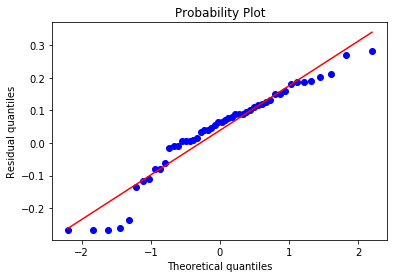


Simulating a regression problem...


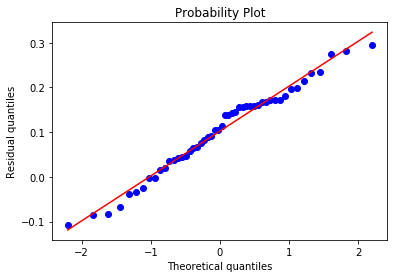


Simulating a regression problem...


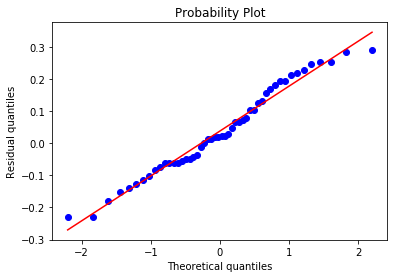


Simulating a regression problem...


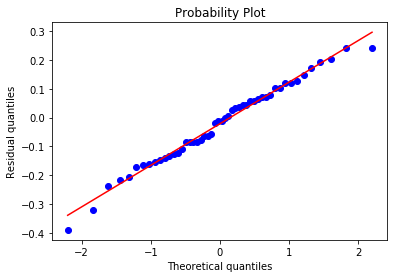

In [30]:
num_samples=50
num_dim = 15
X = np.random.random(size=(num_samples,num_dim))
coeff = np.random.randint(-10,10,num_dim)   
m = mlr()

for i in range(5,21,5):
    print(f"\nSimulating a regression problem...")
    y = np.dot(coeff,X.T)+i*np.random.normal(num_samples)
    m.ingest_data(X,y)
    m.fit()
    m.qqplot_resid()

## **REFERENCES**

Alternatives:

* [Importing Jupyter Notebooks as Modules](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html)